In [1]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare

In [2]:
def benford_x_digit(rawdata,digit):
    data_nonzero=filter(lambda n: n !=0. , rawdata)
    data=list(data_nonzero)
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    data_count={}
    for i in range(10**(digit-1),10**digit):
        data_count[i]=0      
    data_xdigits=[int(str(abs(x*1000))[0:digit]) for x in data]
    for i in range(len(data_xdigits)):
            data_count[data_xdigits[i]]=data_count[data_xdigits[i]]+1
    list_tuples=sorted(data_count.items())
    data_count=[i[1] for i in list_tuples]
    total_count=sum(data_count)
    expected_count=[p * total_count for p in BFD]
    return  data_count, expected_count

In [3]:
def plot_benford(data,digit):   
    data_count, expected_count =benford_x_digit(data,digit)
    y1 = expected_count
    y2 = data_count
    x= np.arange(10**(digit-1),10**digit)
    bins = np.linspace(1, 10)
    width=.35
    plt.bar(x, y1, width, label="Benford")
    plt.bar(x+width, y2, width, label="Actual")
    plt.xticks(x+width/2 , x)
    plt.legend(loc='upper right')
    plt.show()

In [4]:
#data=[4,1,2,3,4,10,2,4,334,667,878,989,7,12,22,100,132,144,167,1000,190,58,299,4,30,500,0,72,-1,0.02,999999,100,111,34,111,12,3,5,7,6,8,9,6,23,3,6,214,38,1,223,2,11,223,4,1,2,33,4,55,]
df= pd.read_excel("data.xlsx")
df

,Unnamed: 0,field1,field2,field3
0,0,0,0,62
1,1,11,-781,-486
2,2,25,-4684,-3887
3,3,-6,-99,-26
4,4,77,5379,2574
...,...,...,...,...
19995,19995,-26,249,457
19996,19996,11,-25,24
19997,19997,2,405,540
19998,19998,-40,-2678,-4710


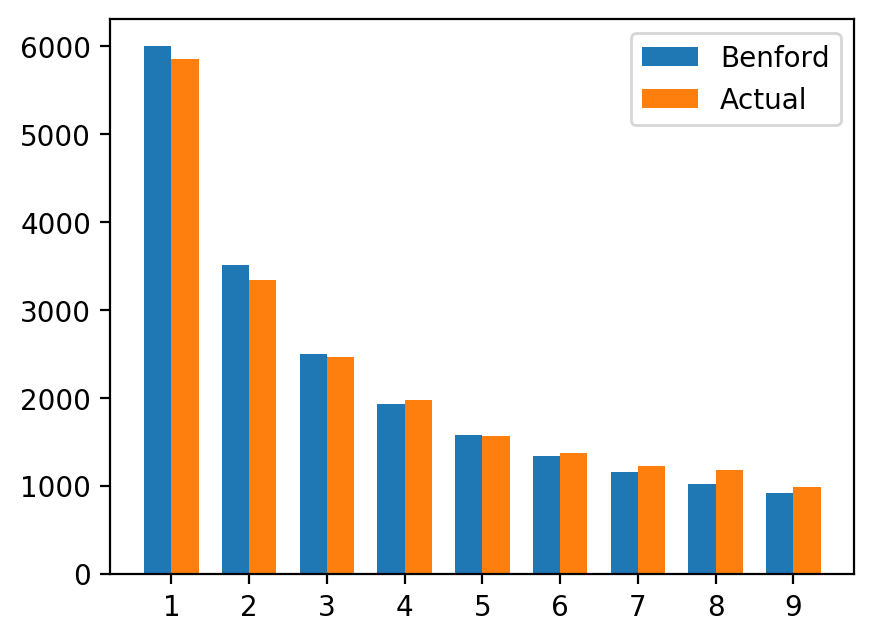

In [5]:
digit=1
data=df["field3"].tolist()
plot_benford(data,digit)

In [12]:
def chi_square_test(data_count,digit):
    total_count=sum(data_count)  
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    expected_count=[p * total_count for p in BFD]     
    chisq, pvalue = chisquare(data_count, f_exp=expected_count) 
    return chisq , pvalue




In [13]:
data_count, expected_count =benford_x_digit(data,1)
total_count=sum(data_count)  
data_count
chisquare, pvalue = chi_square_test(data_count,digit)
print("CHI square statistic:",chisquare)
print("p value",pvalue)



TypeError: 'numpy.float64' object is not callable

In [11]:
anomalies=[]
delta_list=[]
for i in range(len(data_count)):
    delta=((expected_count[i]-data_count[i])**2)
    delta_list.append(delta)
    anomalies.append([i+1,data_count[i],expected_count[i],delta])

std= np.std(delta_list)
mean=np.mean(delta_list)
print(std, mean)

11244.856857815028 10163.098742715765


In [12]:
anomalies

[[1, 5853, 6006.752533479081, 23639.841551235844],
 [2, 3342, 3513.7249831970635, 29489.46985403173],
 [3, 2458, 2493.027550282017, 1226.9292787592165],
 [4, 1970, 1933.7423995627578, 1314.613589466707],
 [5, 1569, 1579.9825836343057, 120.61714328451903],
 [6, 1374, 1335.8562402892562, 1454.9464048709604],
 [7, 1223, 1157.171309992761, 4333.416428069161],
 [8, 1176, 1020.6974329150463, 24118.887343176542],
 [9, 989, 913.0449666477118, 5769.1670915472105]]